In [60]:
#importing required libraries
import cv2 #OpenCV for image processing
import numpy as np #numpy for carrying out operations using arrays
from matplotlib import pyplot as plt #matplotlib to display images and histograms
# matplotlib is preferred ahead of Pillow as images can be opened within colab and can be easily customised as per requirements
from google.colab import files #allows user to upload images
from PIL import Image #to open image
import io #handle the data obtained from images

In [58]:
#enables user to upload an image
upload_file = files.upload()
for i in upload_file.keys():
    img = Image.open(io.BytesIO(upload_file[i])) #makes the raw bytes from the uploaded image look like a file
    img = np.array(img) #converts into numpy array for processing

Saving eiffel_tower.jpg to eiffel_tower (2).jpg


In [59]:
def plot_histogram(image, title="Histogram"):
    plt.figure(figsize=(6,4))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='gray') #image.ravel() flattens the image to 2D; bins divides the pixel intensity range into 256 levels
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    plt.show()

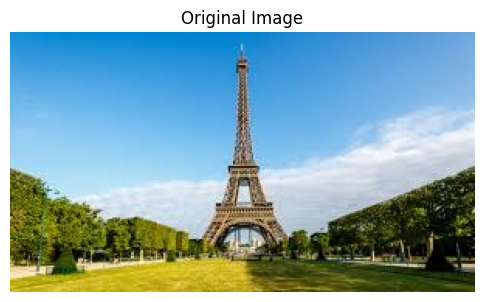

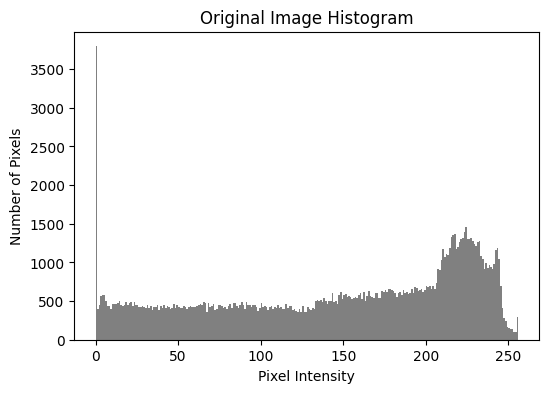

In [61]:
#display the uploaded image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

print(' '*20)

#plotting histogram for original image
plot_histogram(img, "Original Image Histogram")

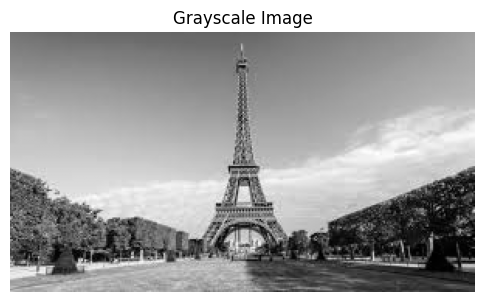

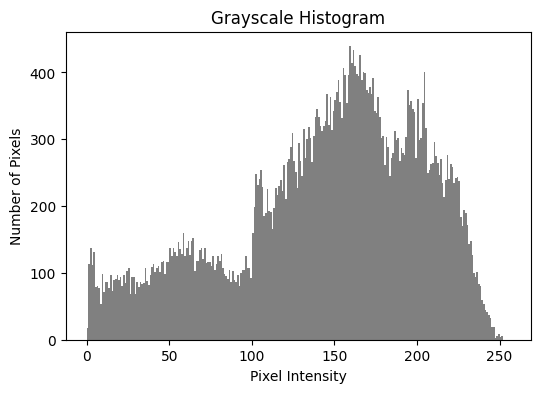

In [64]:
#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #converts from RGB to grayscale
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray') #ensures grayscale display
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

print(' '*20)

#plotting histogram for grayscale image
plot_histogram(gray, "Grayscale Histogram")

In [66]:
from ipywidgets import interact

# Global variable to store the final brightened image and value
final_bright_img = None
final_brightness_value = 0

#code to allow user to change the brightness of the grayscale image
def adjust_brightness(image, value):
    # alpha = contrast (1 = no change)
    # beta = brightness value (-100 to +100)
    new_img = cv2.convertScaleAbs(image, alpha=1, beta=value)
    return new_img

# Interactive function to update image display and histogram
def interactive_brightness(value):
    global final_bright_img, final_brightness_value  # store final values
    # Apply brightness change
    final_bright_img = adjust_brightness(gray, value)
    final_brightness_value = value

    # Display brightened image
    plt.figure(figsize=(6,6))
    plt.imshow(final_bright_img, cmap='gray')
    plt.title(f"Brightness Adjusted ({value})")
    plt.axis('off')
    plt.show()

    print(' '* 20)

    # Display histogram of the brightened image
    plt.figure(figsize=(6,4))
    plt.hist(final_bright_img.ravel(), bins=256, range=[0,256], color='gray')  # Flatten image for histogram
    plt.title(f"Histogram after Brightness: {value}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    plt.show()

# Slider for brightness adjustment (-100 to +100)
interact(interactive_brightness, value=(-100, 100, 5))

interactive(children=(IntSlider(value=0, description='value', min=-100, step=5), Output()), _dom_classes=('wid…

<function __main__.interactive_brightness(value)>

In [67]:
from ipywidgets import interact

# Global variables to store the final contrast image and value
final_contrast_img = None
final_contrast_value = 1.0

#high contrast -> bright areas become brighter, dark areas become darker; vice-versa for low contrast
def adjust_contrast(image, factor):
    """
    factor > 1  → increase contrast
    factor = 1  → no change
    factor < 1  → reduce contrast
    """
    new_img = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return new_img

# Interactive function to update contrast and show image + histogram
def interactive_contrast(factor):
    global final_contrast_img, final_contrast_value  # <-- Add this
    # Apply contrast change
    final_contrast_img = adjust_contrast(gray, factor)
    final_contrast_value = factor

    #displaying the image with changed contrast
    plt.figure(figsize=(6,6))
    plt.imshow(final_contrast_img, cmap='gray')
    plt.title(f"Contrast x{factor}")
    plt.axis('off')
    plt.show()

    print(' '*20)

    # Display histogram of contrast-adjusted image
    plt.figure(figsize=(6,4))
    plt.hist(final_contrast_img.ravel(), bins=256, range=[0,256], color='gray')  # Flatten image for histogram
    plt.title(f"Histogram after Contrast x{factor}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    plt.show()

# Slider for contrast factor (0.5 to 3.0 with step 0.1)
interact(interactive_contrast, factor=(0.5, 3.0, 0.1))

interactive(children=(FloatSlider(value=1.7000000000000002, description='factor', max=3.0, min=0.5), Output())…

<function __main__.interactive_contrast(factor)>

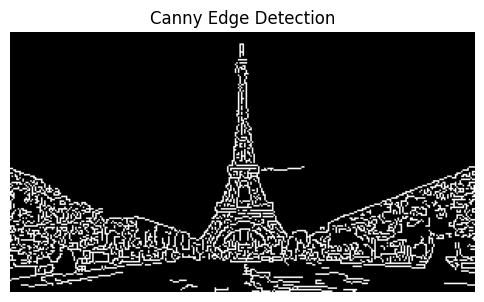

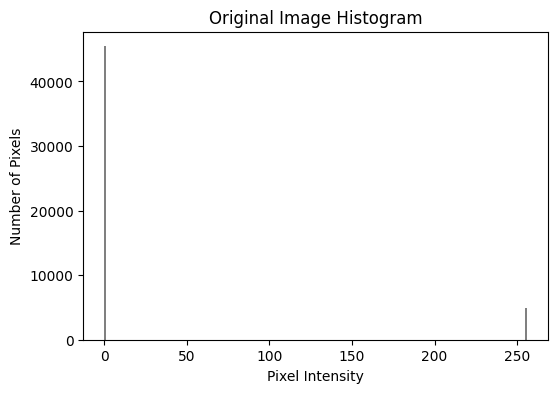

In [68]:
#Canny edge detection detects sharp edges in the image

edges = cv2.Canny(gray, threshold1=100, threshold2=200) #refer to the lower and upper threshold respectively
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

print(' '*20)

#plotting histogram for each image
plot_histogram(edges, "Original Image Histogram")

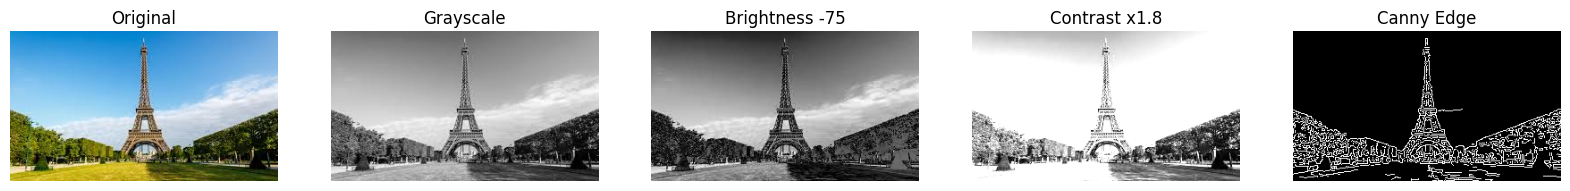

In [69]:
plt.figure(figsize=(20,5))

# Original Image
plt.subplot(1,5,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Grayscale
plt.subplot(1,5,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Brightness-adjusted
plt.subplot(1,5,3)
plt.imshow(final_bright_img, cmap='gray')
plt.title(f"Brightness {final_brightness_value}")
plt.axis('off')

# Contrast-adjusted
plt.subplot(1,5,4)
plt.imshow(final_contrast_img, cmap='gray')
plt.title(f"Contrast x{final_contrast_value}")
plt.axis('off')

# Edge-detected
plt.subplot(1,5,5)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge")
plt.axis('off')

plt.show()



